# <center>City, University of London - MSc Artificial Intelligence
# <center>INM701 - COURSEWORK
## LSTM algorithm
### Student:
>García Plaza, Albert

***

The present notebook has been written in order to classify the data using a Random Forest classifier.
Feature reduction techniques have been applied to decrease the sparsity of our data-set. Furthermore, we fine-tune a Random Forest Classifier for human activity recognition problem using techniques such as Randomised Cross Validation Search, Grid Search, and finally, we compare our results by observing the confusion matrix and F1-scores.

In [1]:
import pandas as pd
import numpy as np
import sys
import os
CURRENT_DIR=os.getcwd()
FILE_PATH_OF_DATA='processed_data/nontemportal_principal_features_axis.pkl'
FILE_PATH_OF_FEATURE_SELECTOR=CURRENT_DIR+'/feature-selector'
sys.path.insert(1, FILE_PATH_OF_FEATURE_SELECTOR)

In [2]:
# Read the data
df=pd.read_pickle(FILE_PATH_OF_DATA)

In [3]:
# Dropping NaNs
print('Before dropping NaNs, length= ' + str(df.shape[0]))
print('After dropping NaNs, length = ' +str(df.dropna().shape[0]))
print(str(df.shape[0]-df.dropna().shape[0]) + ' records dropped')
df=df.dropna().reset_index(drop=True)

Before dropping NaNs, length= 11713
After dropping NaNs, length = 11713
0 records dropped


In [4]:
df.describe()

,user,mean_P_LO_x,mean_P_LO_y,mean_P_LO_z,mean_P_LA_x,mean_P_LA_y,mean_P_LA_z,mean_P_LV_x,mean_P_LV_y,mean_P_LV_z,...,med_W_AO_x,med_W_AO_y,med_W_AO_z,med_W_AA_x,med_W_AA_y,med_W_AA_z,med_W_AV_x,med_W_AV_y,med_W_AV_z,activity
count,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,...,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000,11713.000000
mean,24.864595,0.080631,0.135269,-0.059264,0.002744,0.074057,0.097901,-0.037435,-0.122667,0.209347,...,-0.115606,0.073965,0.246505,0.016049,0.002829,-0.137880,-0.000160,0.013133,0.306347,8.529412
std,14.723427,0.000243,0.000331,0.000171,0.067101,0.088439,0.068144,0.201065,0.191047,0.156459,...,0.001048,0.001909,0.001310,0.001731,0.003569,0.003093,0.005264,0.008963,0.010669,5.196318
min,0.000000,0.076487,0.130469,-0.061683,-0.127564,-0.083246,-0.064444,-0.638404,-0.603061,-0.329280,...,-0.126946,0.048016,0.232853,0.000246,-0.035686,-0.167692,-0.053521,-0.055623,0.195787,0.000000
25%,12.000000,0.080614,0.135252,-0.059277,-0.043081,-0.012952,0.060048,-0.145478,-0.246488,0.136031,...,-0.115808,0.073638,0.246139,0.015795,0.003052,-0.137811,-0.000885,0.011567,0.304155,4.000000
50%,25.000000,0.080631,0.135268,-0.059264,0.002441,0.065141,0.092153,-0.038784,-0.129722,0.194861,...,-0.115622,0.073698,0.246178,0.016084,0.003323,-0.137416,0.000170,0.012026,0.304566,9.000000
75%,37.000000,0.080649,0.135287,-0.059251,0.053586,0.132739,0.143199,0.077824,-0.016198,0.282449,...,-0.115450,0.073860,0.246523,0.016308,0.003432,-0.137336,0.000868,0.012810,0.305847,13.000000
max,50.000000,0.084476,0.140509,-0.057013,0.153437,0.243392,0.235834,0.593941,0.404195,0.717016,...,-0.101579,0.110187,0.257109,0.030638,0.035550,-0.111932,0.037756,0.087049,0.386481,17.000000


# Feature Selection
There are five methods used to identify features to remove:

1. Missing Values
2. Single Unique Values
3. Collinear Features
4. Zero Importance Features
5. Low Importance Features
### https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Usage.ipynb

In [9]:
from feature_selector import FeatureSelector
X= df.drop(['user', 'activity'], axis=1)
y= df['activity']

fs = FeatureSelector(data = X, labels = y)
fs = FeatureSelector(data = X, labels = y)
fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'multi_logloss', 
                                     'cumulative_importance': 0.99})

train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = False)

0 features with greater than 0.60 missing values.

0 features with a single unique value.

16 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[381]	valid_0's multi_logloss: 0.149412
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[436]	valid_0's multi_logloss: 0.146232
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[627]	valid_0's multi_logloss: 0.161422
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[498]	valid_0's multi_logloss: 0.155135
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[423]	valid_0's multi_logloss: 0.137963
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[568]	valid_0's multi_logloss: 0

In [10]:
important_features=list(train_removed_all_once.columns)

In [18]:
import pickle

with open('features.pkl', 'wb') as f:
    pickle.dump(important_features, f)

In [5]:
import pickle
file = open('features.pkl', 'rb')

# dump information to that file
important_features = pickle.load(file)

In [18]:
print('Original Number of Features', X.shape[1])
print('Final Number of Features: ', train_removed_all_once.shape[1])


# Train-Test Split

### 80 - 20 Ratio Selected.
1. Train Set represents Subject 0-39
2. Test Set represents Subject 40-49

In [7]:
# Train-Test Split (80-20). Users 40-49 are test set

train_set=df[df['user']<=39]
test_set=df[df['user']>39]


X_train = train_set[important_features]
X_test = test_set[important_features]
y_train = train_set['activity']
y_test =  test_set['activity']


# Training our base model for Random-Forest classifier
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.
https://en.wikipedia.org/wiki/Random_forest
## We use default parameters of Scikit-Learn Random Forest Classifier for our base model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# First create the base model to tune
rf = RandomForestClassifier()

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy=accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy*100))
    return accuracy
base_model =  RandomForestClassifier()


base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Accuracy = 63.95%.


# F1-Scores and Confusion Matrix

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = base_model.predict(X_test)

print(classification_report(y_test, predictions))




              precision    recall  f1-score   support

           0       0.74      0.55      0.63       143
           1       0.98      0.97      0.97       143
           2       0.55      0.71      0.62       117
           3       0.58      0.69      0.63       143
           4       0.69      0.83      0.76       130
           5       0.67      0.89      0.76       130
           6       0.75      0.81      0.78       143
           7       0.47      0.46      0.46       143
           8       0.36      0.42      0.38       130
           9       0.38      0.30      0.34       143
          10       0.57      0.53      0.55       143
          11       0.24      0.18      0.21       130
          12       0.64      0.69      0.67       143
          13       0.61      0.63      0.62       143
          14       0.93      0.57      0.70       143
          15       0.88      0.72      0.79       130
          16       0.88      0.72      0.79       143
          17       0.67    

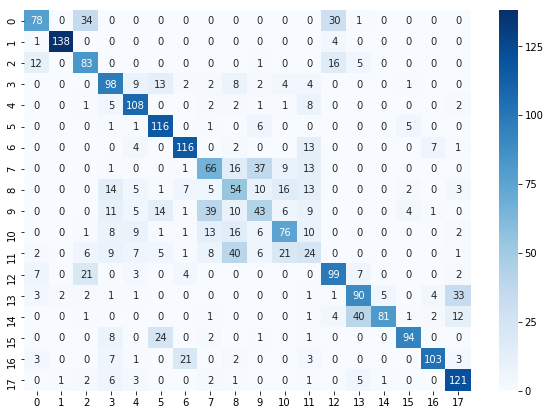

In [11]:
labels = []
labels.extend(range(0, 18))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(confusion_matrix(y_test, predictions), index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='g',cmap='Blues')

# Hyper Parameter Optimization
### 1. Randomized Cross Validation Search

In [14]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestClassifier
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "time

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [ ]:

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))



Model Performance
Accuracy = 70.76%.
Improvement of 7.92%.


In [ ]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}


### 2. Grid Cross-Validation Search on narrowed down search space

In [19]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100,110,120],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4],
    'n_estimators': [900,1000,1100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_




Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.3min
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be cau

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))



# Final Model on best parameters

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators= 1000,
min_samples_split=2, 
min_samples_leaf=1, 
max_features='sqrt', 
max_depth= 110, 
bootstrap= True)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy=accuracy_score(y_test, predictions)
print('Model Performance')
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Accuracy = 0.71%.


# F1 scores and Confusion Matrix

In [16]:
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.97      0.50      0.66       143
           1       0.99      0.99      0.99       143
           2       0.61      0.82      0.70       117
           3       0.76      0.74      0.75       143
           4       0.75      0.88      0.81       130
           5       0.69      0.89      0.78       130
           6       0.87      0.90      0.88       143
           7       0.51      0.42      0.46       143
           8       0.46      0.61      0.53       130
           9       0.48      0.43      0.45       143
          10       0.62      0.69      0.65       143
          11       0.17      0.06      0.09       130
          12       0.72      0.85      0.78       143
          13       0.70      0.72      0.71       143
          14       1.00      0.62      0.76       143
          15       0.79      0.82      0.80       130
          16       0.90      0.87      0.88       143
          17       0.64    

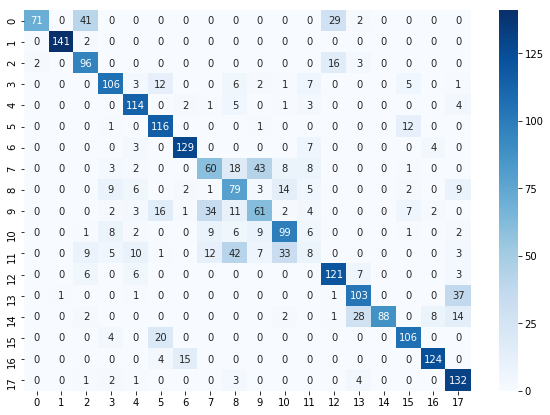

In [17]:
labels = []
labels.extend(range(0, 18))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(confusion_matrix(y_test, predictions), index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='g',cmap='Blues')